In [1]:
import cartopy.crs as ccrs
from extractROIfiles import normIm, cartopy_pyresample_toggle_extent,  trasform_cartopy_extent
from extractROIfiles import getPlankConsts, Rad2BT, mat2pandas
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import os
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
#import seaborn as sns
from datetime import datetime
import pandas as pd
from scipy import io as so
import matplotlib as mpl
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10, 6)
#sns.set(style='darkgrid')
%matplotlib inline

In [2]:
# Laptop paths
datapath = Path('/','mnt','c','Users','michael.GLASSLAB-MODIIN','.Virtualbox','Desktop','roi_fall_data')
matfilepath = Path('/home/michael/dropbox/goesproject/GOESEvalData')
#outputpath = Path('/','mnt','g','GOESProj','data','fall_data')
fname16_103 = datapath/Path('OR_ABI-L1b-RadF-M6C08_G16_s2019103_xr.nc')
fname17_103 = datapath/Path('OR_ABI-L1b-RadF-M6C08_G17_s2019103_xr.nc')
acm16Fname = datapath/Path('OR_ABI-L2-ACMF-M6C00_G16_s2019103_xr.nc')
acm17Fname = datapath/Path('OR_ABI-L2-ACMF-M6C00_G17_s2019103_xr.nc')
tempFname = matfilepath/Path('INST_CAL_2019103.mat')

In [6]:
fname16_103.exists()

True

In [7]:
fname17_103.exists()

True

In [8]:
acm17Fname.exists()

True

In [9]:
acm16Fname.exists()

True

In [3]:
pc = ccrs.PlateCarree()
mc = ccrs.Mercator()

# Convert extent from pc to mc (both cylindrical projections)
extent_pc = [-109.59326, -102.40674, 8.94659, -8.94656]
target_extent_mc_cartopy = trasform_cartopy_extent(extent_pc, pc, mc)
target_extent_mc_pyresample = cartopy_pyresample_toggle_extent(target_extent_mc_cartopy)
print('target_extent_mc_pyresample',target_extent_mc_pyresample)
print('target_extent_mc_cartopy',target_extent_mc_cartopy)


target_extent_mc_pyresample [-12199865.89757484    993361.38872422 -11399866.15059916
   -993358.03009699]
target_extent_mc_cartopy [-12199865.89757484 -11399866.15059916    993361.38872422
   -993358.03009699]


In [4]:
new16_103_xr = xr.load_dataset(fname16_103)

In [5]:
new17_103_xr = xr.load_dataset(fname17_103)

In [13]:
date16_103 = str(new16_103_xr.time[0].dt.strftime('%Y %B %d').data)
print(date16_103)

2019 April 13


/home/michael/miniconda3/envs/goesenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


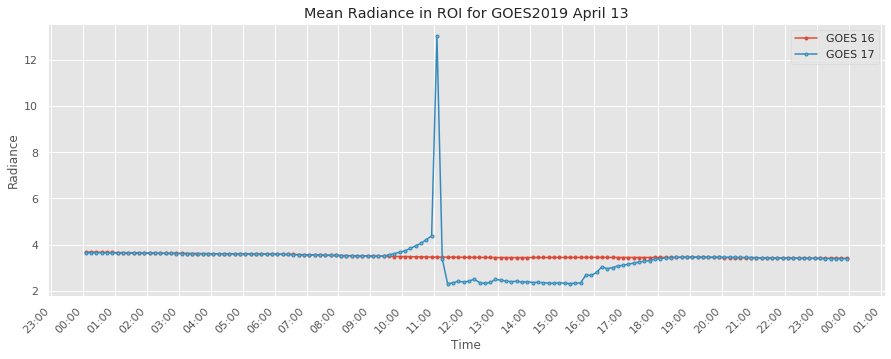

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
new16_103_xr.Rad.mean(['x','y']).plot(ax=ax,marker='.',mfc='r',label='GOES 16')
new17_103_xr.Rad.mean(['x','y']).plot(ax=ax,marker='.',mfc='c',label='GOES 17')
ax.set_title('Mean Radiance in ROI for GOES'+str(new16_103_xr.time[0].dt.strftime('%Y %B %d').data))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:00'))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1/24))
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.set_ylabel('Radiance')
ax.set_xlabel('Time')
ax.legend()
ax.tick_params('x', labelrotation=45)

In [11]:
plc = getPlankConsts(new16_103_xr)

In [12]:
temp17 = so.loadmat(tempFname)
#df_temp_17 = pd.DataFrame({'Temperture':temp17,'time':new17_103_xr.time.data})
temp17

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Jun 27 20:15:21 2019',
 '__version__': '1.0',
 '__globals__': [],
 'LWIRTemp': array([[80.8793869 , 80.88565826, 80.80680084, ..., 80.84153748,
         80.90301514, 80.90615082]]),
 'TIME': array([[737528.00000589, 737528.00001747, 737528.00002904, ...,
         737528.99997152, 737528.99998309, 737528.99999466]])}

In [13]:
temp_df = mat2pandas(temp17)

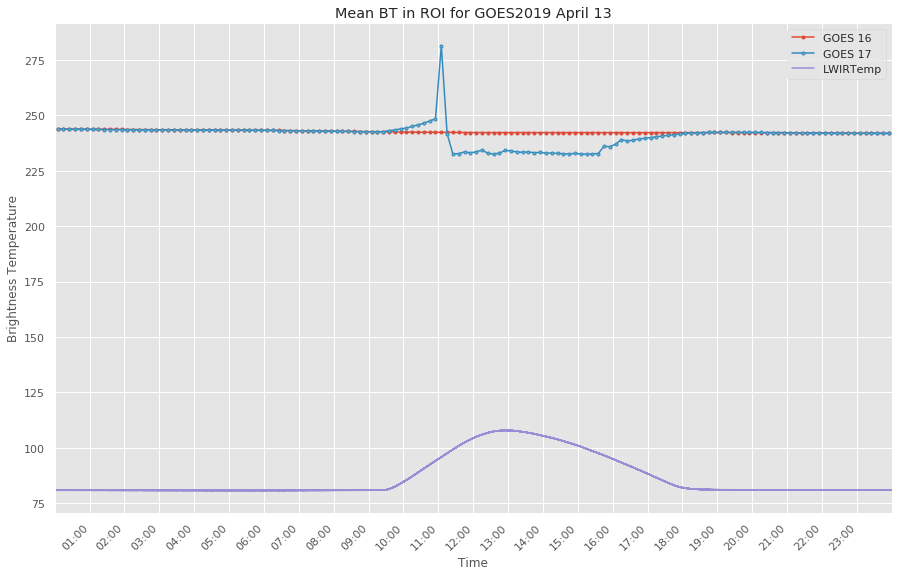

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
Rad2BT(new16_103_xr.Rad.mean(['x','y']), plc).plot(ax=ax,marker='.',mfc='r', label='GOES 16')
Rad2BT(new17_103_xr.Rad.mean(['x','y']), plc).plot(ax=ax,marker='.',mfc='c', label='GOES 17')
temp_df.plot(ax=ax,mfc='k',label='GOES 17 LWIRTemp')
ax.set_title('Mean BT in ROI for GOES'+str(new16_103_xr.time[0].dt.strftime('%Y %B %d').data))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:00'))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1/24))
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.set_ylabel('Brightness Temperature')
ax.set_xlabel('Time')
ax.legend()
ax.tick_params('x', labelrotation=45)

In [15]:
acm16_103_xr = xr.load_dataset(acm16Fname)
#acm16_103_xr

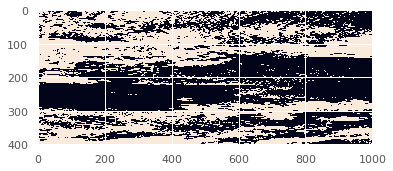

In [16]:
plt.imshow(acm16_103_xr.BCM.data[:,:,0])

In [17]:
cfnew17_103_xr=new17_103_xr.copy(deep=True)
cfnew16_103_xr=new16_103_xr.copy(deep=True)

In [18]:
cfnew16_103_xr.Rad.data[acm16_103_xr.BCM.data==1.0]=np.nan
cfnew17_103_xr.Rad.data[acm16_103_xr.BCM.data==1.0]=np.nan

In [23]:
print(new17_103_xr.Rad.mean(['x','y']))

<xarray.DataArray 'Rad' (time: 144)>
array([ 3.652508 ,  3.6495223,  3.647166 ,  3.6463478,  3.6420555,
        3.6389785,  3.6359127,  3.6350923,  3.6293771,  3.6274822,
        3.6253011,  3.6230304,  3.6207838,  3.6183326,  3.6167574,
        3.61418  ,  3.6120563,  3.609808 ,  3.608554 ,  3.6065636,
        3.604469 ,  3.6029727,  3.6009588,  3.6007419,  3.5990205,
        3.5978336,  3.5969892,  3.5975358,  3.5968642,  3.5969367,
        3.5957484,  3.5940044,  3.592563 ,  3.5893705,  3.5873764,
        3.5833685,  3.5789304,  3.5748403,  3.5686991,  3.5624223,
        3.5583413,  3.5520396,  3.5484023,  3.5441952,  3.5386972,
        3.5342062,  3.5298   ,  3.525265 ,  3.5201168,  3.5155144,
        3.5110638,  3.5056007,  3.5006723,  3.495905 ,  3.4918942,
        3.4966009,  3.4985702,  3.55832  ,  3.6012626,  3.671873 ,
        3.7264888,  3.8313775,  3.9409637,  4.051809 ,  4.2105274,
        4.3735285, 13.034255 ,  3.3745282,  2.3088403,  2.3320396,
        2.4097707,  2.369

In [24]:
acm16_103_xr.BCM.mean(['x','y'])

<xarray.DataArray 'BCM' (time: 144)>
array([0.4490796 , 0.41277176, 0.3677046 , 0.34468025, 0.32567683,
       0.30827776, 0.2951313 , 0.28715423, 0.26299387, 0.255246  ,
       0.25586882, 0.25788674, 0.26008406, 0.26236358, 0.26339993,
       0.26469043, 0.26664606, 0.26893306, 0.27044278, 0.26942384,
       0.26743332, 0.2662624 , 0.2664343 , 0.26441887, 0.26396298,
       0.2648748 , 0.26614034, 0.26593855, 0.26771232, 0.26778707,
       0.2688334 , 0.27285433, 0.2746381 , 0.27798885, 0.2807417 ,
       0.2814567 , 0.28333262, 0.28544772, 0.28895044, 0.29354435,
       0.2964168 , 0.2989853 , 0.30071923, 0.30054483, 0.30179298,
       0.30427927, 0.30690506, 0.3102359 , 0.3119474 , 0.31239334,
       0.31275707, 0.31216165, 0.31439632, 0.3169175 , 0.32021594,
       0.32058716, 0.3235991 , 0.32543516, 0.32665092, 0.32550243,
       0.326342  , 0.3286838 , 0.3301113 , 0.32969773, 0.3296205 ,
       0.3312199 , 0.33371615, 0.33526823, 0.33608037, 0.33937135,
       0.34208184, 0.3432677 , 0.34550735, 0.34782922, 0.3480634 ,
       0.34898517, 0.34921438, 0.35070166, 0.3532303 , 0.35619742,
       0.36133194, 0.37631696, 0.41161084, 0.4475674 , 0.45949313,
       0.46036756, 0.45477465, 0.44623208, 0.4491668 , 0.4539924 ,
       0.45910448, 0.4626969 , 0.46671534, 0.47338447, 0.47856632,
       0.47812286, 0.4821139 , 0.47926387, 0.47530025, 0.47325492,
       0.4708932 , 0.4726321 , 0.4748045 , 0.4743685 , 0.47097042,
       0.4591319 , 0.44806316, 0.43892765, 0.4341195 , 0.4300089 ,
       0.4283248 , 0.42748523, 0.42561677, 0.42474484, 0.42606023,
       0.4324578 , 0.43906218, 0.4495056 , 0.46047968, 0.4643785 ,
       0.46351653, 0.46113488, 0.45633668, 0.45474973, 0.45355144,
       0.45766702, 0.45975223, 0.46411443, 0.46978956, 0.47667295,
       0.48178506, 0.48960266, 0.50026286, 0.5082449 , 0.5163216 ,
       0.52438337, 0.52671516, 0.5283968 , 0.52997875, 0.5287182 ,
       0.5255916 , 0.5160002 , 0.500502  , 0.47848162], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2019-04-13T00:05:05.456272 ... 2019-04-13T23:55:05.812400

In [19]:
cf16df = pd.DataFrame({'G16':np.array([
    Rad2BT(np.nanmean(cfnew16_103_xr.Rad.data[:,:,ind]), plc)
                              for ind in range(0,144)])}, index=new16_103_xr.time.data)
cf16df

,G16
2019-04-13 00:05:05.456269952,244.878644
2019-04-13 00:15:05.456635904,244.828483
2019-04-13 00:25:05.460836096,244.765087
2019-04-13 00:35:05.464349952,244.725032
2019-04-13 00:45:05.463904000,244.696597
...,...
2019-04-13 23:15:05.802817920,245.256593
2019-04-13 23:25:05.806839040,245.249119
2019-04-13 23:35:05.808635904,245.219597
2019-04-13 23:45:05.811826048,245.197849


In [20]:
cf17df = pd.DataFrame({'G17':np.array([
    Rad2BT(np.nanmean(cfnew17_103_xr.Rad.data[:,:,ind]), plc)
                              for ind in range(0,144)])}, 
                      index=new17_103_xr.time.data)
cf17df

,G17
2019-04-13 00:05:07.261137920,244.645598
2019-04-13 00:15:07.261837056,244.606985
2019-04-13 00:25:07.262927104,244.565793
2019-04-13 00:35:07.258572032,244.555671
2019-04-13 00:45:07.265229952,244.531039
...,...
2019-04-13 23:15:07.263326080,245.232019
2019-04-13 23:25:07.261569024,245.193011
2019-04-13 23:35:07.264562944,245.160782
2019-04-13 23:45:07.260849024,245.131494


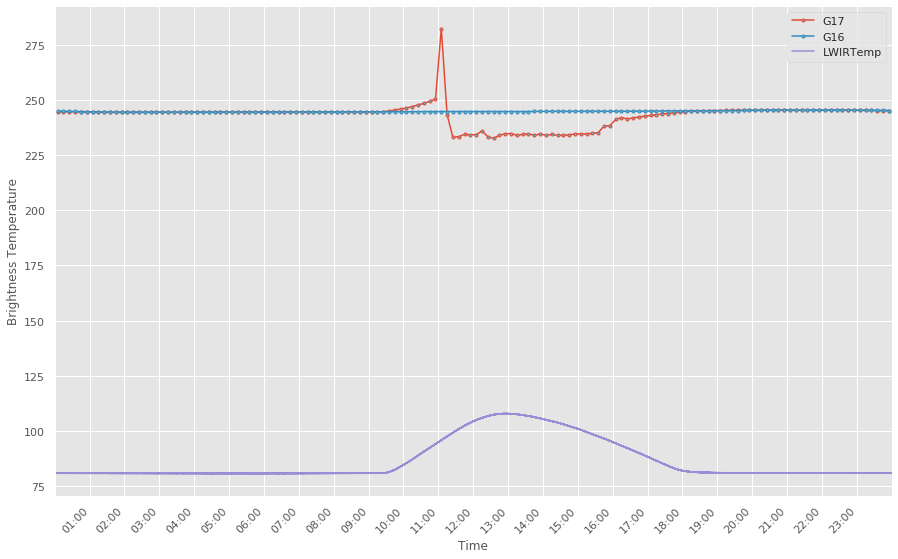

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
#Rad2BT(new16_103_xr.Rad.mean(['x','y']), plc).plot(ax=ax,marker='.',mfc='r', label='GOES 16')
cf17df.plot(ax=ax,marker='.',mfc='c', label='GOES 17')
cf16df.plot(ax=ax,marker='.',mfc='c', label='GOES 16')
temp_df.plot(ax=ax,mfc='k',label='GOES 17 LWIRTemp')
#ax.set_title('Mean BT in ROI for GOES'+str(new16_103_xr.time[0].dt.strftime('%Y %B %d').data))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:00'))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1/24))
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.set_ylabel('Brightness Temperature')
ax.set_xlabel('Time')
ax.legend()
ax.tick_params('x', labelrotation=45)

/home/michael/miniconda3/envs/goesenv/lib/python3.8/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


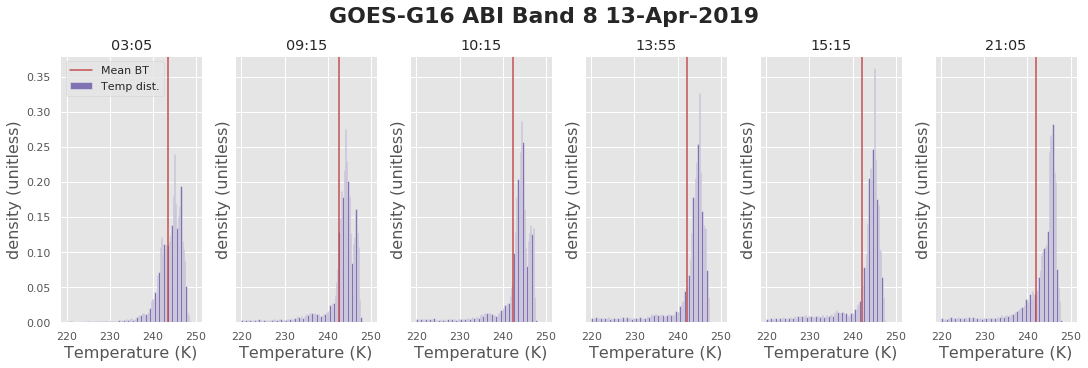

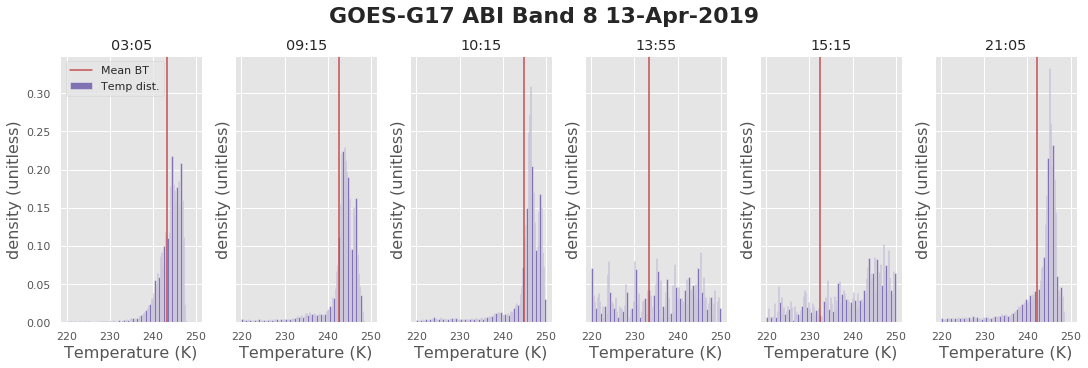

In [28]:
# Histograms for full ROI
#toi = ['0300','0910','1010','1350','1510','2100']
toi = ['030','091','101','135','151','210']
bb=8
dd=5
goes_8_xr = {'G16':new16_103_xr, 'G17':new17_103_xr}
bins = np.linspace(220,250,101)
for SS in ['G16','G17']:
    bins = np.linspace(220,250,101)
    fig, axes = plt.subplots(ncols=6, nrows =1, figsize=(15, 5), 
                             constrained_layout=True, sharey = True, 
                             sharex = True)
    fig.suptitle(f'GOES-{SS} ABI Band {bb} {8+dd}-Apr-2019', 
                 fontsize = 22, fontweight = 'bold')
    rois = goes_8_xr[SS].Rad[:,:,[(str(item.data)[:3] in toi)
                for item in goes_8_xr[SS].time.dt.strftime('%H%M')]]
    rois_sz = rois.shape
    for ind in range(rois_sz[2]):
        ax = axes[ind]
        ax.set_title(f'{ind}')
        ax.set_ylabel('density (unitless)',fontsize = 16)
        ax.set_xlabel('Temperature (K)', fontsize = 16)
        ax.set_title(rois[:,:,ind].time.dt.strftime('%H:%M').data)
        ax.hist(Rad2BT(rois[:,:,ind],plc).data.ravel(), 
                                            bins = bins,
                                            color='b' if SS=='16' else 'm',
                                           density = True, 
                                           label = 'Temp dist.')
        ax.axvline(Rad2BT(rois[:,:,ind].mean(['x','y']), plc), 
                   color='r',label = 'Mean BT')
    axes[0].legend(loc='upper left')

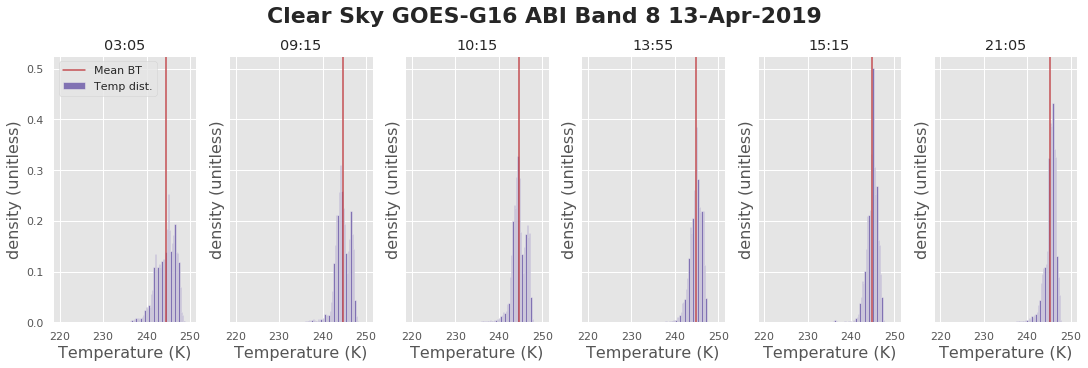

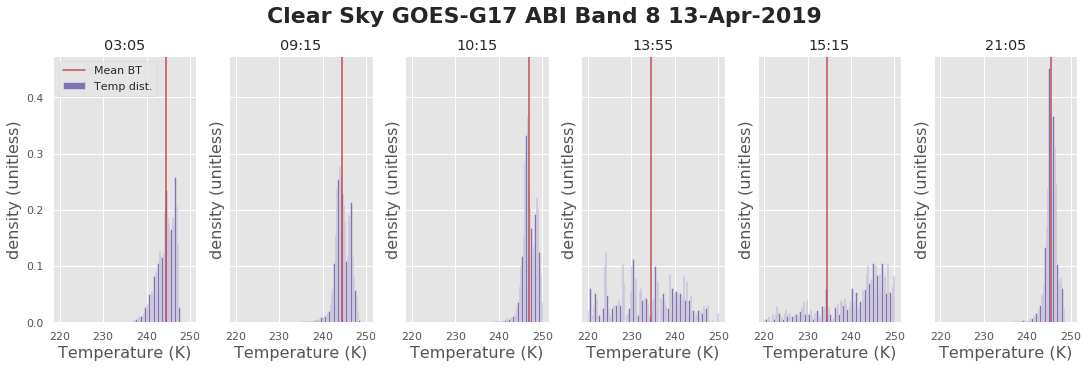

In [30]:
# Histograms for the cloud free part
#toi = ['0300','0910','1010','1350','1510','2100']
toi = ['030','091','101','135','151','210']
bb=8
dd=5
cfgoes_8_xr = {'G16':cfnew16_103_xr, 'G17':cfnew17_103_xr}
bins = np.linspace(220,250,101)
for SS in ['G16','G17']:
    bins = np.linspace(220,250,101)
    fig, axes = plt.subplots(ncols=6, nrows =1, figsize=(15, 5), 
                             constrained_layout=True, sharey = True, 
                             sharex = True)
    fig.suptitle(f'Clear Sky GOES-{SS} ABI Band {bb} {8+dd}-Apr-2019', 
                 fontsize = 22, fontweight = 'bold')
    cfrois = cfgoes_8_xr[SS].Rad[:,:,[(str(item.data)[:3] in toi)
                for item in goes_8_xr[SS].time.dt.strftime('%H%M')]]
    cfrois_sz = cfrois.shape
    for ind in range(cfrois_sz[2]):
        ax = axes[ind]
        ax.set_title(f'{ind}')
        ax.set_ylabel('density (unitless)',fontsize = 16)
        ax.set_xlabel('Temperature (K)', fontsize = 16)
        ax.set_title(rois[:,:,ind].time.dt.strftime('%H:%M').data)
        ax.hist(Rad2BT(cfrois[:,:,ind],plc).data.ravel(), 
                                            bins = bins,
                                            color='b' if SS=='16' else 'm',
                                           density = True, 
                                           label = 'Temp dist.')
        ax.axvline(Rad2BT(cfrois[:,:,ind].mean(['x','y']), plc), 
                   color='r',label = 'Mean BT')
    axes[0].legend(loc='upper left')

In [32]:
times.dt.strftime('%H%M')

<xarray.DataArray 'strftime' (time: 144)>
array(['0005', '0015', '0025', '0035', '0045', '0055', '0105', '0115',
       '0125', '0135', '0145', '0155', '0205', '0215', '0225', '0235',
       '0245', '0255', '0305', '0315', '0325', '0335', '0345', '0355',
       '0405', '0415', '0425', '0435', '0445', '0455', '0505', '0515',
       '0525', '0535', '0545', '0555', '0605', '0615', '0625', '0635',
       '0645', '0655', '0705', '0715', '0725', '0735', '0745', '0755',
       '0805', '0815', '0825', '0835', '0845', '0855', '0905', '0915',
       '0925', '0935', '0945', '0955', '1005', '1015', '1025', '1035',
       '1045', '1055', '1105', '1115', '1125', '1135', '1145', '1155',
       '1205', '1215', '1225', '1235', '1245', '1255', '1305', '1315',
       '1325', '1335', '1345', '1355', '1405', '1415', '1425', '1435',
       '1445', '1455', '1505', '1515', '1525', '1535', '1545', '1555',
       '1605', '1615', '1625', '1635', '1645', '1655', '1705', '1715',
       '1725', '1735', '1745', '1755', '1805', '1815', '1825', '1835',
       '1845', '1855', '1905', '1915', '1925', '1935', '1945', '1955',
       '2005', '2015', '2025', '2035', '2045', '2055', '2105', '2115',
       '2125', '2135', '2145', '2155', '2205', '2215', '2225', '2235',
       '2245', '2255', '2305', '2315', '2325', '2335', '2345', '2355'],
      dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 2019-04-13T00:05:07.261137920 ... 2019-04-13T23:55:07.262747008

In [33]:
times[[True for item in times.dt.strftime('%H%M')[:3]
       if item in ['030','091','101','135','151','210']]]

<xarray.DataArray 'time' (time: 0)>
array([], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns]

In [34]:
len([item for item in times.dt.strftime('%H%M')])

144

In [35]:
times[[(str(item.data)[:3] in toi)
 for item in times.dt.strftime('%H%M')]]

<xarray.DataArray 'time' (time: 6)>
array(['2019-04-13T03:05:07.264861952', '2019-04-13T09:15:07.452355072',
       '2019-04-13T10:15:07.449862016', '2019-04-13T13:55:07.453382016',
       '2019-04-13T15:15:07.456433024', '2019-04-13T21:05:07.488641024'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-04-13T03:05:07.264861952 ... 2019-04-13T21:05:07.488641024

In [36]:
rois.shape

(401, 1001, 6)

In [37]:
goes_8_xr[SS].Rad[:,:,0]

<xarray.DataArray 'Rad' (x: 401, y: 1001)>
array([[3.5124292, 3.5124292, 3.5124292, ..., 3.7468863, 3.7468863,
        3.7468863],
       [3.5266385, 3.5266385, 3.519534 , ..., 3.7539911, 3.7539911,
        3.7539911],
       [3.4982195, 3.4982195, 3.5266385, ..., 3.7397814, 3.7397814,
        3.7397814],
       ...,
       [2.2335718, 2.2335718, 2.2548862, ..., 4.073705 , 4.073705 ,
        4.073705 ],
       [2.1767337, 2.1767337, 2.0985813, ..., 4.09502  , 4.09502  ,
        4.116334 ],
       [2.0062194, 2.0062194, 2.0062194, ..., 4.1305437, 4.1305437,
        4.1305437]], dtype=float32)
Coordinates:
    lon      (x, y) float64 -109.6 -109.6 -109.6 -109.6 ... -102.4 -102.4 -102.4
    lat      (x, y) float64 -8.924 -8.924 -8.924 -8.924 ... 8.924 8.924 8.924
    time     datetime64[ns] 2019-04-13T00:05:07.261137920
Dimensions without coordinates: x, y